In [1]:
import cs_vqe_classes.cs_vqe_circuit as cs_circ
import utils.cs_vqe_tools as cs_tools
import utils.plotting_tools as plot
from utils.molecule_tools import get_molecule
from matplotlib import pyplot as plt
import json

file = 'molecule_data'
with open('data/'+file+'.json', 'r') as json_file:
    molecule_data = json.load(json_file)
        
species = list(molecule_data.keys())
species

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


['H2_3-21G_SINGLET',
 'H6_STO-3G_SINGLET',
 'H12_STO-3G_SINGLET',
 'H2_6-31G_SINGLET',
 'H2_6-311G_SINGLET',
 'H3+_STO-3G_SINGLET',
 'H3+_3-21G_SINGLET',
 'H3+_STO-3G_SINGLET_alt',
 'HeH+_3-21G_SINGLET',
 'HeH+_3-21G_SINGLET_alt',
 'HeH+_6-311G_SINGLET',
 'H2O_STO-3G_SINGLET',
 'H2O_STO-3G_SINGLET_alt',
 'BeH+_STO-3G_SINGLET',
 'LiH_STO-3G_SINGLET',
 'CH+_STO-3G_SINGLET',
 'FH_STO-3G_SINGLET',
 'B+_STO-3G_SINGLET',
 'N+_STO-3G_SINGLET',
 'OH+_STO-3G_SINGLET',
 'F2_STO-3G_SINGLET',
 'O_STO-3G_SINGLET',
 'CH2_STO-3G_SINGLET',
 'BeH2_STO-3G_SINGLET',
 'Be_STO-3G_SINGLET',
 'C_STO-3G_SINGLET']

In [2]:
species=["H2_3-21G_SINGLET",
"H3+_STO-3G_SINGLET",
"H3+_3-21G_SINGLET",
"HeH+_3-21G_SINGLET",
"HeH+_6-311G_SINGLET",
"H2O_STO-3G_SINGLET",
"BeH+_STO-3G_SINGLET",
"LiH_STO-3G_SINGLET",
"CH+_STO-3G_SINGLET",
"FH_STO-3G_SINGLET",
"B+_STO-3G_SINGLET"]

In [6]:
anz_data = {}
for speciesname in species:
    print(speciesname)
    molecule    = get_molecule(speciesname, taper=True)
    num_qubits  = molecule['num_qubits']
    ham         = molecule['hamiltonian']
    uccsd       = molecule['uccsdansatz']
    hf_config   = molecule['hf_config']
    terms_noncon = cs_tools.greedy_dfs(ham, 3, criterion='size')[-1]
    mol_circ = cs_circ.cs_vqe_circuit(hamiltonian =ham,
                                      terms_noncon=terms_noncon,
                                      num_qubits  =num_qubits, 
                                      hf_config   =hf_config)
    anz_data[speciesname] = {'num_qubits':num_qubits, 
                             'num_terms':{'full':len(uccsd)},
                             'circdepth':{'full':mol_circ.full_uccsd(uccsd).depth()},
                             'chemaccnum':mol_circ.chem_acc_num_q}
    for num_sim_q in range(1, num_qubits+1):
        anz_data[speciesname]['num_terms'][num_sim_q] = len(mol_circ.project_anz_terms(uccsd, num_sim_q))
        anz_data[speciesname]['circdepth'][num_sim_q] = mol_circ.build_circuit(uccsd, num_sim_q).depth()


H2_3-21G_SINGLET
Dooh
H3+_STO-3G_SINGLET
C2v
H3+_3-21G_SINGLET
C2v
HeH+_3-21G_SINGLET
Coov
HeH+_6-311G_SINGLET
Coov
H2O_STO-3G_SINGLET
C2v
BeH+_STO-3G_SINGLET
Coov
LiH_STO-3G_SINGLET
Coov
CH+_STO-3G_SINGLET
Coov
FH_STO-3G_SINGLET
Coov
B+_STO-3G_SINGLET
SO3


In [7]:
anz_data

{'H2_3-21G_SINGLET': {'num_qubits': 5,
  'num_terms': {'full': 24, 1: 1, 2: 2, 3: 12, 4: 36, 5: 66},
  'circdepth': {'full': 385, 1: 7, 2: 22, 3: 133, 4: 393, 5: 907},
  'chemaccnum': 4},
 'H3+_STO-3G_SINGLET': {'num_qubits': 3,
  'num_terms': {'full': 8, 1: 0, 2: 2, 3: 19},
  'circdepth': {'full': 112, 1: 2, 2: 25, 3: 205},
  'chemaccnum': 2},
 'H3+_3-21G_SINGLET': {'num_qubits': 9,
  'num_terms': {'full': 44,
   1: 1,
   2: 2,
   3: 12,
   4: 36,
   5: 39,
   6: 56,
   7: 46,
   8: 72,
   9: 128},
  'circdepth': {'full': 869,
   1: 7,
   2: 22,
   3: 136,
   4: 400,
   5: 498,
   6: 815,
   7: 727,
   8: 1274,
   9: 2653},
  'chemaccnum': 8},
 'HeH+_3-21G_SINGLET': {'num_qubits': 6,
  'num_terms': {'full': 36, 1: 0, 2: 0, 3: 8, 4: 10, 5: 56, 6: 90},
  'circdepth': {'full': 616, 1: 2, 2: 2, 3: 72, 4: 129, 5: 860, 6: 1498},
  'chemaccnum': 5},
 'HeH+_6-311G_SINGLET': {'num_qubits': 10,
  'num_terms': {'full': 60,
   1: 1,
   2: 4,
   3: 19,
   4: 28,
   5: 60,
   6: 64,
   7: 84,
   8:

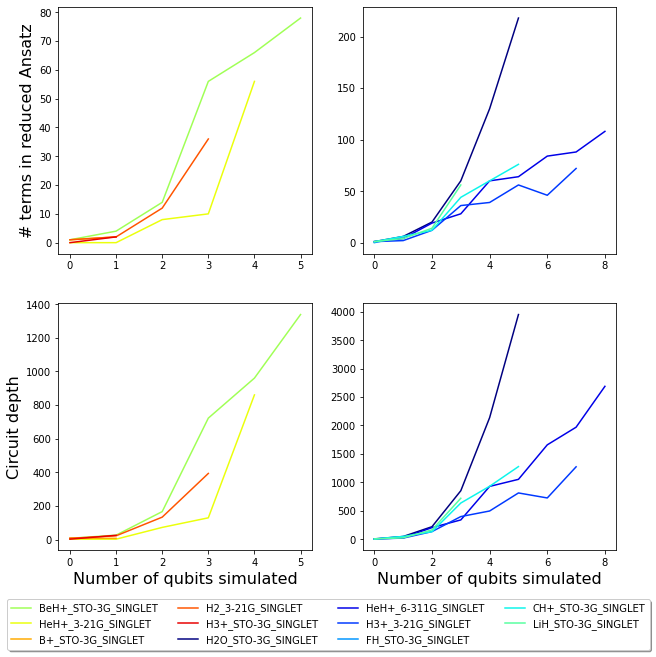

In [11]:
anz_data_sorted = sorted(anz_data, key=lambda x:anz_data[x]['num_qubits'])
anz_data_sorted.reverse()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10, 10))

for i, speciesname in enumerate(anz_data_sorted):
    c = plt.cm.jet(i/len(anz_data))
    if i <=5:
        index = 1
    else:
        index = 0
    
    data = anz_data[speciesname]
    X = list(range(1, data['chemaccnum']+1))#+['full']
    X_full = X+['full']
    Y_anznm = [data['num_terms'][i] for i in X]
    Y_anznm_full = [data['num_terms'][i] for i in X_full]
    Y_depth = [data['circdepth'][i] for i in X]
    Y_depth_full = [data['circdepth'][i] for i in X_full]

    axes[(0, index)].plot(list(range(data['chemaccnum'])), Y_anznm, label=speciesname, color=c)
    axes[(1, index)].plot(list(range(data['chemaccnum'])), Y_depth, color=c)
    #axes[(0, index)].plot(X_full, Y_anznm_full, color=c, ls='-.')
    #axes[(1, index)].plot(X_full, Y_depth_full, color=c, ls='-.')
    #axes[(0, 1)].set_xticklabels(list(range(1, 14))+['full'])

for i in range(2):
    axes[(1,i)].set_xlabel('Number of qubits simulated',fontsize=16)
axes[(0,0)].set_ylabel('# terms in reduced Ansatz',fontsize=16)
axes[(1,0)].set_ylabel('Circuit depth',fontsize=16)

fig.legend(loc='lower center',bbox_to_anchor=(0.5, -0.02),
          fancybox=True, shadow=True, ncol=4)

In [122]:
#fig.savefig('plots/reduced_ansatz_depth.png', dpi=300, bbox_inches='tight')

In [37]:
#len(anz_data_sorted)

11